<a href="https://colab.research.google.com/github/hadil1999-creator/Summer-internship-project/blob/main/Projet_Healthcare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import dataset

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!kaggle datasets download -d paultimothymooney/medical-speech-transcription-and-intent

100% 5.25G/5.27G [02:04<00:00, 44.6MB/s]
100% 5.27G/5.27G [02:04<00:00, 45.5MB/s]


In [ ]:
!unzip medical-speech-transcription-and-intent

In [ ]:
!pip install SpeechRecognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 32.8 MB 54 kB/s 


In [ ]:
import speech_recognition as sr
r = sr.Recognizer()

In [ ]:
with sr.AudioFile('/content/Medical Speech, Transcription, and Intent/recordings/train/1249120_44142156_102100267.wav') as source:
    # listen for the data (load audio to memory)
    audio_data = r.record(source)
    # recognize (convert from speech to text)
    text = r.recognize_google(audio_data)
    print(text)

I feel really sad all the time


Data treatement

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/Medical Speech, Transcription, and Intent/overview-of-recordings.csv')
df

,audio_clipping,audio_clipping:confidence,background_noise_audible,background_noise_audible:confidence,overall_quality_of_the_audio,quiet_speaker,quiet_speaker:confidence,speaker_id,file_download,file_name,phrase,prompt,writer_id
0,no_clipping,1.0000,light_noise,1.0000,3.33,audible_speaker,1.0,43453425,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43453425_58166571.wav,When I remember her I feel down,Emotional pain,21665495
1,light_clipping,0.6803,no_noise,0.6803,3.33,audible_speaker,1.0,43719934,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43719934_43347848.wav,When I carry heavy things I feel like breaking...,Hair falling out,44088126
2,no_clipping,1.0000,no_noise,0.6655,3.33,audible_speaker,1.0,43719934,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43719934_53187202.wav,there is too much pain when i move my arm,Heart hurts,44292353
3,no_clipping,1.0000,light_noise,1.0000,3.33,audible_speaker,1.0,31349958,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_31349958_55816195.wav,My son had his lip pierced and it is swollen a...,Infected wound,43755034
4,no_clipping,1.0000,no_noise,1.0000,4.67,audible_speaker,1.0,43719934,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43719934_82524191.wav,My muscles in my lower back are aching,Infected wound,21665495
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6656,no_clipping,1.0000,no_noise,0.6076,3.80,audible_speaker,1.0,14353703,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_14353703_45949288.wav,I feel a burning sensation in my guts about 2 ...,Stomach ache,40925305
6657,no_clipping,1.0000,no_noise,0.7829,3.80,audible_speaker,1.0,15004831,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_15004831_26452554.wav,I have a split on my thumb that will not heal.,Open wound,43755034
6658,no_clipping,1.0000,no_noise,0.6061,3.80,audible_speaker,1.0,15004831,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_15004831_64958100.wav,I feel a lot of pain in the joints.,Joint pain,43772689
6659,no_clipping,1.0000,no_noise,0.8215,3.80,audible_speaker,1.0,15830408,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_15830408_92962528.wav,The area around my heart doesn't feel good.,Heart hurts,44292353


In [ ]:
df['writer_id'].duplicated().count()

6661

delete useless columns

In [ ]:
del df['file_download']

Delete spaces from column names

In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
df

,audio_clipping,audio_clipping:confidence,background_noise_audible,background_noise_audible:confidence,overall_quality_of_the_audio,quiet_speaker,quiet_speaker:confidence,speaker_id,file_name,phrase,prompt,writer_id
0,no_clipping,1.0000,light_noise,1.0000,3.33,audible_speaker,1.0,43453425,1249120_43453425_58166571.wav,remember feel,Emotional pain,21665495
1,light_clipping,0.6803,no_noise,0.6803,3.33,audible_speaker,1.0,43719934,1249120_43719934_43347848.wav,carry heavy things feel like breaking back,Hair falling out,44088126
2,no_clipping,1.0000,no_noise,0.6655,3.33,audible_speaker,1.0,43719934,1249120_43719934_53187202.wav,much pain move arm,Heart hurts,44292353
3,no_clipping,1.0000,light_noise,1.0000,3.33,audible_speaker,1.0,31349958,1249120_31349958_55816195.wav,son lip pierced swollen skin inside lip grey l...,Infected wound,43755034
4,no_clipping,1.0000,no_noise,1.0000,4.67,audible_speaker,1.0,43719934,1249120_43719934_82524191.wav,muscles lower back aching,Infected wound,21665495
...,...,...,...,...,...,...,...,...,...,...,...,...
6656,no_clipping,1.0000,no_noise,0.6076,3.80,audible_speaker,1.0,14353703,1249120_14353703_45949288.wav,feel burning sensation guts 2 hours meal.,Stomach ache,40925305
6657,no_clipping,1.0000,no_noise,0.7829,3.80,audible_speaker,1.0,15004831,1249120_15004831_26452554.wav,split thumb heal.,Open wound,43755034
6658,no_clipping,1.0000,no_noise,0.6061,3.80,audible_speaker,1.0,15004831,1249120_15004831_64958100.wav,feel lot pain joints.,Joint pain,43772689
6659,no_clipping,1.0000,no_noise,0.8215,3.80,audible_speaker,1.0,15830408,1249120_15830408_92962528.wav,area around heart feel good.,Heart hurts,44292353


In [ ]:
for col in df.columns:
    print(col)

audio_clipping
audio_clipping:confidence
background_noise_audible
background_noise_audible:confidence
overall_quality_of_the_audio
quiet_speaker
quiet_speaker:confidence
speaker_id
file_name
phrase
prompt
writer_id


Visualisation

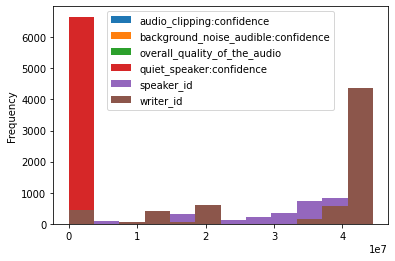

In [ ]:
import matplotlib.pyplot as plt
ax = df.plot.hist(bins=12, alpha=1)


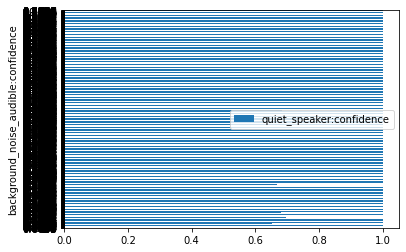

In [ ]:
ax = df.plot.barh(x='background_noise_audible:confidence', y='quiet_speaker:confidence')

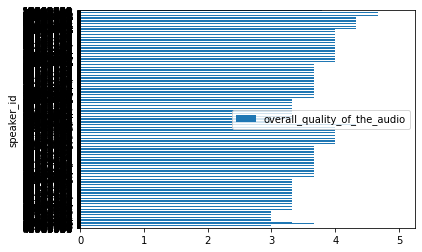

In [ ]:
ax = df.plot.barh(x='speaker_id', y='overall_quality_of_the_audio')

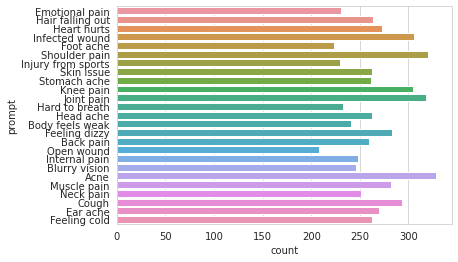

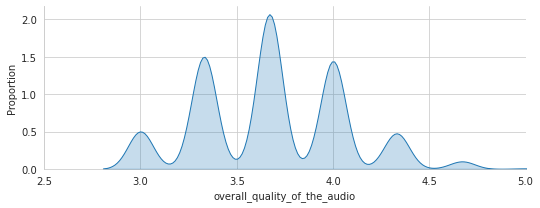

In [ ]:
import seaborn as sns
sns.set_style("whitegrid")
promptsPlot = sns.countplot(y='prompt',data=df)
promptsPlot

qualityPlot = sns.FacetGrid(df,aspect=2.5)
qualityPlot.map(sns.kdeplot,'overall_quality_of_the_audio',shade= True)
qualityPlot.set(xlim=(2.5, df['overall_quality_of_the_audio'].max()))
qualityPlot.set_axis_labels('overall_quality_of_the_audio', 'Proportion')
qualityPlot

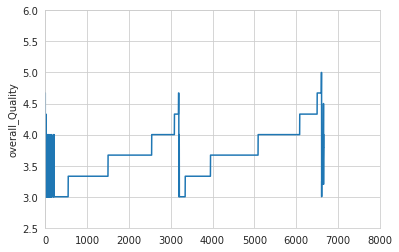

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df['overall_quality_of_the_audio'])
plt.ylabel('overall_Quality')
plt.axis([0,8000,2.5,6]) #(xmin,xmax,ymin,ymax)
plt.savefig('overall_quality')
plt.show()

In [ ]:
from scipy.io.wavfile import read #import the required function from the module
samplerate, data = read('/content/Medical Speech, Transcription, and Intent/recordings/train/1249120_44142156_100535941.wav')
samplerate #echo samplerate
data #echo data -> note that the data is a single dimensional array

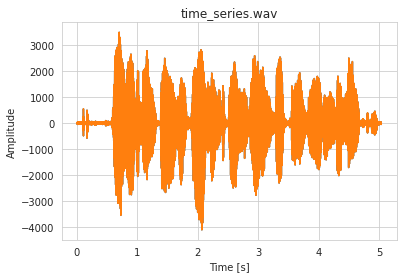

<Figure size 432x288 with 0 Axes>

In [ ]:
import numpy as np
duration = len(data)/samplerate
time = np.arange(0,duration,1/samplerate) #time vector
plt.plot(time,data)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('time_series.wav')
plt.show()
plt.savefig('time_series')

Treat the phrase column

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 
# Using stopwords from English Languages
english_stops = set(stopwords.words('english'))
stopwords = english_stops

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df['phrase']


In [ ]:
L = df['phrase'].values.tolist()
L

6661

In [ ]:
L1=[]
for i in range(len(L)):
  querywords = L[i].split()
  resultwords  = [word for word in querywords if word.lower() not in stopwords]
  result = ' '.join(resultwords)
  L1.append(result)
L1

In [ ]:
for i in range(len(L1)):
  df['phrase'][i] = L1[i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df

,audio_clipping,audio_clipping:confidence,background_noise_audible,background_noise_audible:confidence,overall_quality_of_the_audio,quiet_speaker,quiet_speaker:confidence,speaker_id,file_name,phrase,prompt,writer_id
0,no_clipping,1.0000,light_noise,1.0000,3.33,audible_speaker,1.0,43453425,1249120_43453425_58166571.wav,remember feel,Emotional pain,21665495
1,light_clipping,0.6803,no_noise,0.6803,3.33,audible_speaker,1.0,43719934,1249120_43719934_43347848.wav,carry heavy things feel like breaking back,Hair falling out,44088126
2,no_clipping,1.0000,no_noise,0.6655,3.33,audible_speaker,1.0,43719934,1249120_43719934_53187202.wav,much pain move arm,Heart hurts,44292353
3,no_clipping,1.0000,light_noise,1.0000,3.33,audible_speaker,1.0,31349958,1249120_31349958_55816195.wav,son lip pierced swollen skin inside lip grey l...,Infected wound,43755034
4,no_clipping,1.0000,no_noise,1.0000,4.67,audible_speaker,1.0,43719934,1249120_43719934_82524191.wav,muscles lower back aching,Infected wound,21665495
...,...,...,...,...,...,...,...,...,...,...,...,...
6656,no_clipping,1.0000,no_noise,0.6076,3.80,audible_speaker,1.0,14353703,1249120_14353703_45949288.wav,feel burning sensation guts 2 hours meal.,Stomach ache,40925305
6657,no_clipping,1.0000,no_noise,0.7829,3.80,audible_speaker,1.0,15004831,1249120_15004831_26452554.wav,split thumb heal.,Open wound,43755034
6658,no_clipping,1.0000,no_noise,0.6061,3.80,audible_speaker,1.0,15004831,1249120_15004831_64958100.wav,feel lot pain joints.,Joint pain,43772689
6659,no_clipping,1.0000,no_noise,0.8215,3.80,audible_speaker,1.0,15830408,1249120_15830408_92962528.wav,area around heart feel good.,Heart hurts,44292353


Plot audio file as time series using Scipy python